In [130]:
import pandas as pd
import numpy as np
df = pd.read_parquet('merged_data_pop2010.gzip')
df['DrugsPerCapita'] = df['MME_Calculated']/df['population']

In [131]:
df.head()


,STATE,YEAR,MME_Calculated,population,Deaths,deaths_per_100k,DrugsPerCapita
0,AL,2006,6.130658e+05,2038446.0,165.0,8.094401,0.300752
1,AL,2007,9.556448e+05,2564942.0,287.0,11.189337,0.372580
2,AL,2008,1.196252e+06,2806831.0,361.0,12.861480,0.426193
3,AL,2009,1.313816e+06,3064494.0,389.0,12.693776,0.428722
4,AL,2010,1.383882e+06,2921278.0,321.0,10.988341,0.473725


In [166]:

### Calculating per capita Drugs

df['DrugsPerCapita'] = df['MME_Calculated']/df['population']
    
###Start by subsetting data by years. The analysis will be completed using all available data for that specific area. 
###The following function subsets data by years. 

def year_subset(df, start, end) : 

    boolean_years = (df['YEAR'] >start) & (df['YEAR'] <= end)
    filtered_data = df[boolean_years]
    return(filtered_data)
    
    
###This function produces difference in differnce plots. You can specify the year of the policy and the variable you're interested in. 


def diff_in_diff(data, state, year_change, response):

    data_before = year_subset(data, 2000, year_change)
    data_before['InState'] = np.where(data_before['STATE']==state, state, 'Other')
    data_before = data_before.groupby(['YEAR', 'InState'], as_index=False).mean()
    data_after = year_subset(data, year_change, 2020)
    data_after['InState'] = np.where(data_after['STATE']==state, state, 'Other')
    data_after = data_after.groupby(['YEAR', 'InState'], as_index=False).mean()

    before =(ggplot(data_before, aes(x='YEAR', y= response, group = 'InState')) + geom_line(alpha=.5) + geom_point(aes(color='InState'))+ggtitle('Before Intervention'))
    after = (ggplot(data_after, aes(x='YEAR', y= response, group = 'InState')) + geom_line(alpha=.5) + geom_point(aes(color='InState'))+ggtitle('After Intervention'))
    print(before)
    print(after)

In [142]:
##Merged dataset with mortality

mortality_pop = pd.read_csv('merge_mortality_population_data.csv')

In [160]:
##Processing data 
mortality_pop.head()


grouped_mortality = mortality_pop.groupby(['State', 'County', 'FIPS', 'Year'], as_index=False).sum()

grouped_mortality['Mortality Rate']= grouped_mortality['Deaths']/(grouped_mortality['POPESTIMATE2010']/100000)

##Renaming columns

grouped_mortality.rename(columns= {'Year':'YEAR', 'State':'STATE'}, inplace=True)

In [165]:
texas = grouped_mortality[grouped_mortality['STATE']=='TX']
texas['YEAR'].value_counts()

2010.0    40
2015.0    39
2011.0    36
2008.0    36
2013.0    35
2014.0    35
2012.0    35
2009.0    35
2006.0    33
2007.0    29
2005.0    27
2004.0    26
2003.0    24
Name: YEAR, dtype: int64

C:\Users\Joe Krinke\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Joe Krinke\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


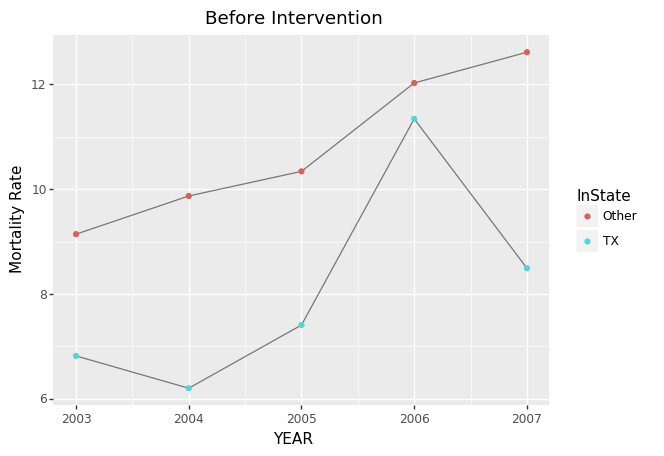

<ggplot: (184307645907)>


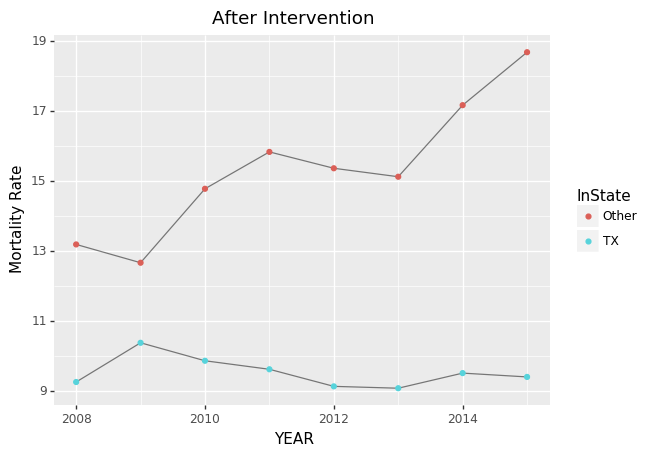

<ggplot: (184307645781)>


In [167]:
#Texas
diff_in_diff(grouped_mortality,'TX', 2007, 'Mortality Rate')

C:\Users\Joe Krinke\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Joe Krinke\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


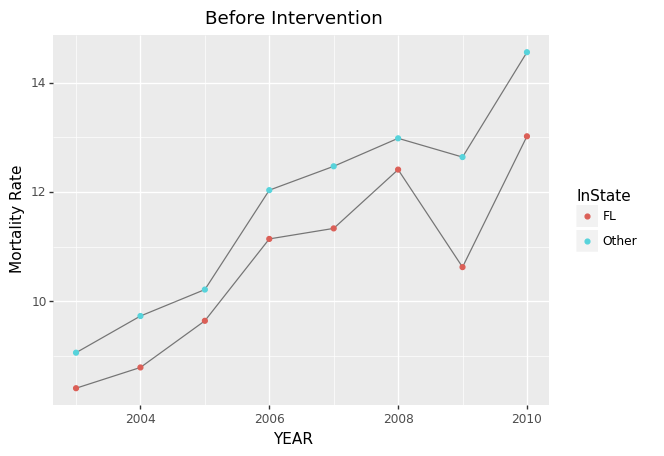

<ggplot: (-9223371852547113682)>


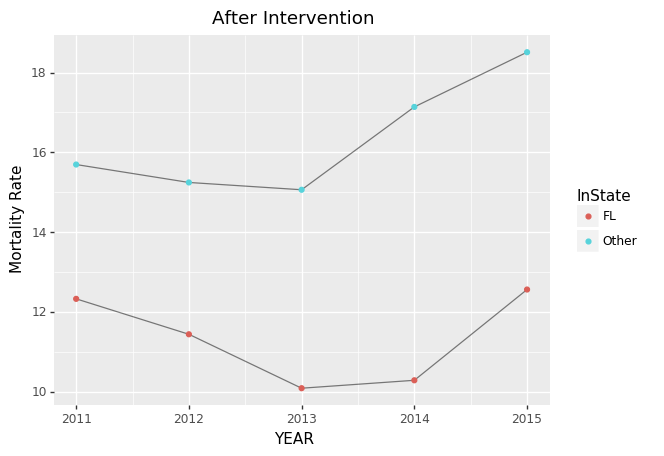

<ggplot: (184307662256)>


In [168]:
#Florida deaths
diff_in_diff(grouped_mortality,'FL', 2010, 'Mortality Rate')

C:\Users\Joe Krinke\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Joe Krinke\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


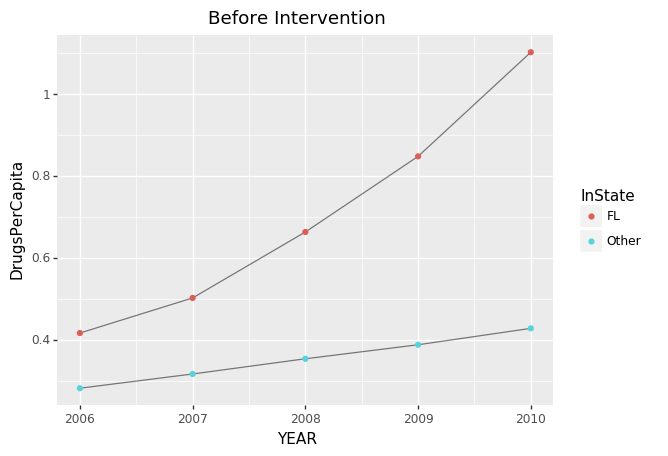

<ggplot: (-9223371852545845837)>


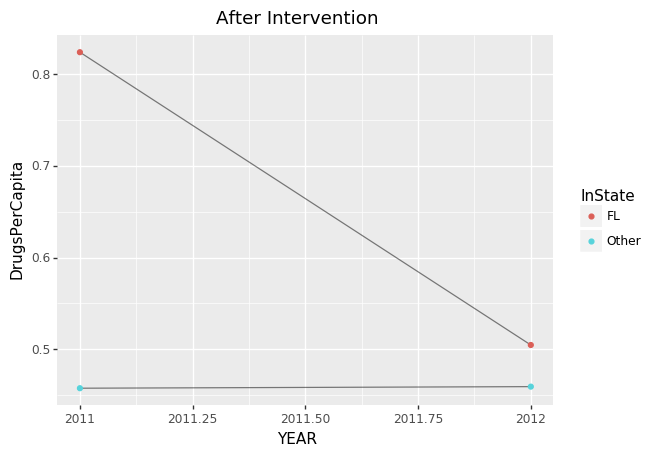

<ggplot: (-9223371852545845935)>


In [171]:
#Florida shipments
diff_in_diff(df,'FL', 2010, 'DrugsPerCapita')

C:\Users\Joe Krinke\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Joe Krinke\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


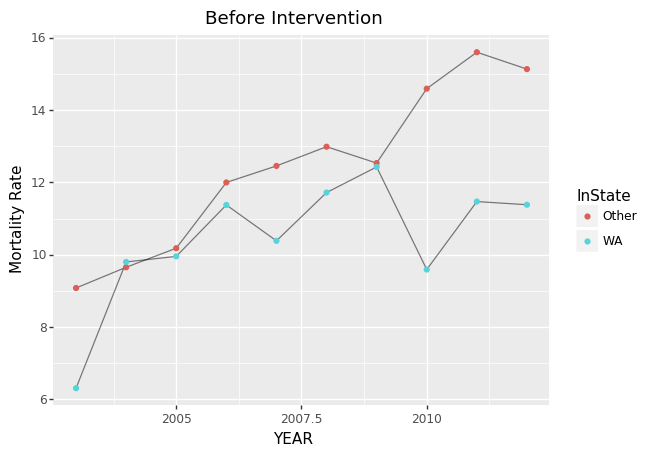

<ggplot: (184307607507)>


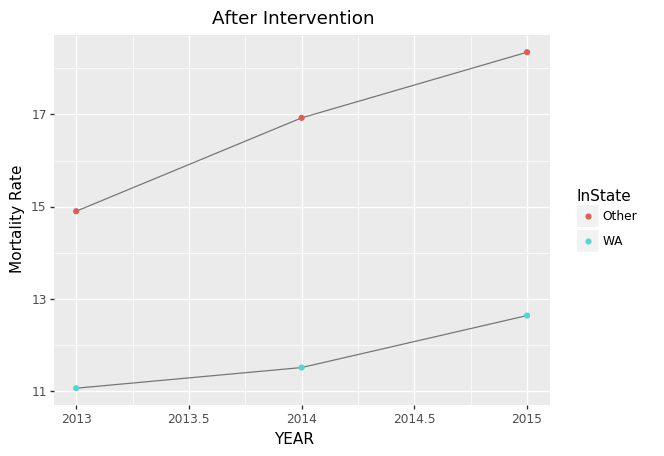

<ggplot: (-9223371852547168431)>


In [187]:
#Washington
diff_in_diff(grouped_mortality,'WA', 2012, 'Mortality Rate')

In [180]:
#Pre and post graphs. 
def pre_post(data, state, year_change, response):

    data_before = year_subset(data, 2000, year_change)
    data_before= data_before[data_before['STATE']==state]
    data_before = data_before.groupby(['YEAR'], as_index=False).mean()
    data_after = year_subset(data, year_change, 2020)
    data_after= data_after[data_after['STATE']==state]
    data_after = data_after.groupby(['YEAR'], as_index=False).mean()
    
    before =(ggplot(data_before, aes(x='YEAR', y= response)) + geom_line(alpha=.5) + geom_point()+ggtitle('Before Intervention'))
    after = (ggplot(data_after, aes(x='YEAR', y= response)) + geom_line(alpha=.5) + geom_point()+ggtitle('After Intervention'))
    print(before)
    print(after)

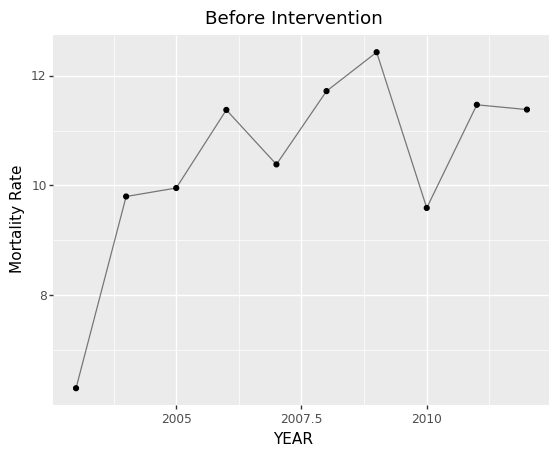

<ggplot: (184306041699)>


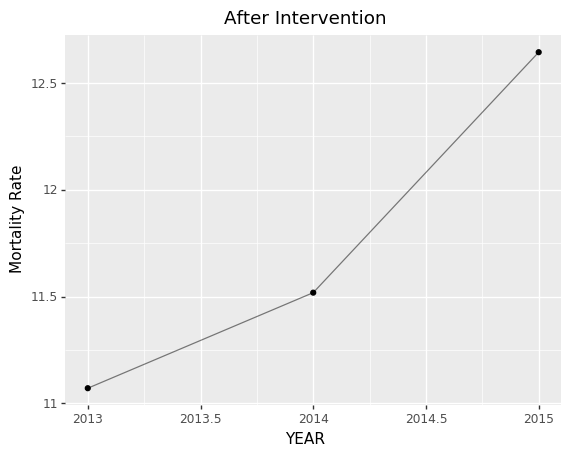

<ggplot: (-9223371852548242428)>


In [190]:
#Pre-psot washington
pre_post(grouped_mortality,'WA', 2012, 'Mortality Rate')

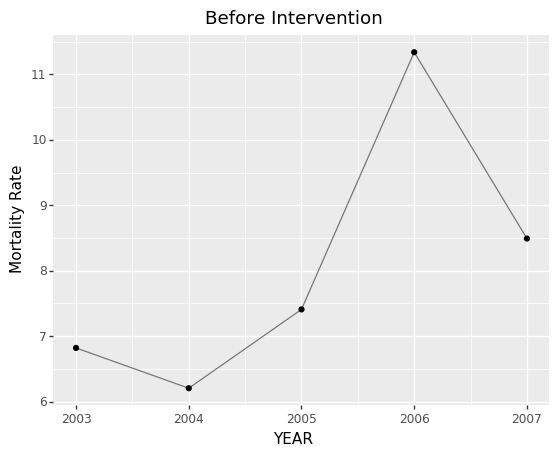

<ggplot: (-9223371852553065528)>


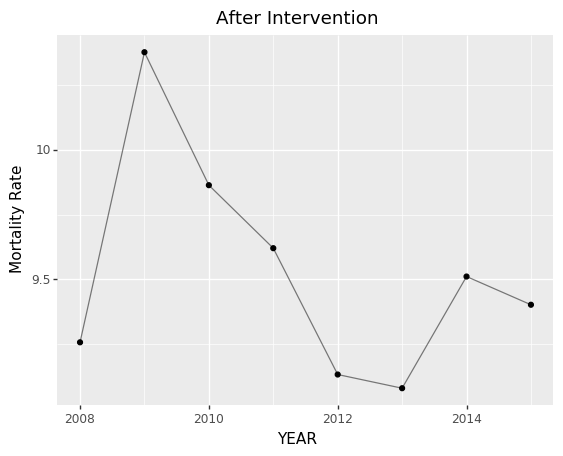

<ggplot: (184306086306)>


In [182]:
#Pre-post Texas
pre_post(grouped_mortality,'TX', 2007, 'Mortality Rate')

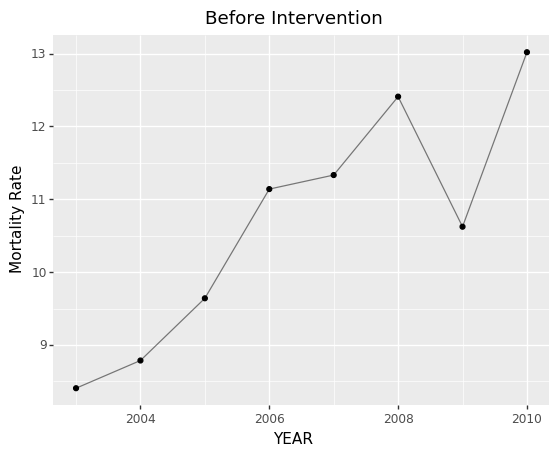

<ggplot: (184306435788)>


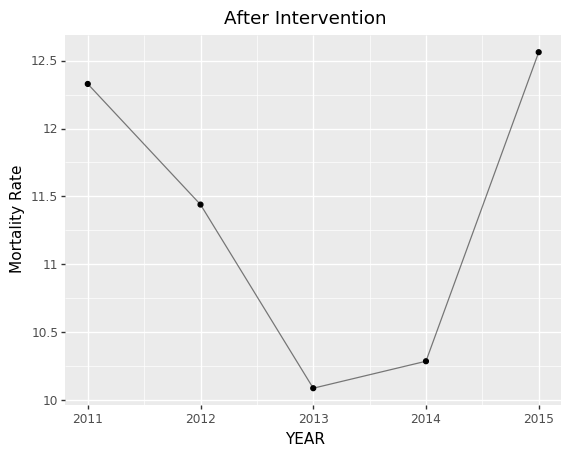

<ggplot: (184306163439)>


In [183]:
#Florida pre-post deaths
pre_post(grouped_mortality,'FL', 2010, 'Mortality Rate')

In [189]:
#Florida shipment pre post
pre_post(grouped_mortality,'FL', 2010, 'DrugsPerCapita')

PlotnineError: "Could not evaluate the 'y' mapping: 'DrugsPerCapita' (original error: name 'DrugsPerCapita' is not defined)"